#<i>Herschel</i> Reference Survey Exploratory Analysis: Dale 2014 Model Fits

This notebook takes a look at the fitting results for the <i>Herschel</i> Reference Survey galaxies using the model from Dale+14.

From Dale+14:
"In the original construction of these templates (Dale et al.
2001; Dale & Helou 2002), a series of “local” SEDs were created
to represent the emission from dust exposed to a wide range of
heating intensities $0.3<U<10^5$ where $U = 1$ corresponds
to the local interstellar radiation field in the solar neighborhood.
A power-law combination of these local curves can effectively
mimic the spatially integrated (“global”) dust emission, i.e.,

$dM_{d} \propto U^{-\alpha}dU$

where $M_{d}$ is the dust mass heated by a radiation field at intensity
$U$ and the exponent $\alpha$ represents the relative contributions of
the different local SEDs."

To these local SEDs, an AGN template from Shi et al 2013 was added at different AGN MIR fractions ranging from 0 to 100% at 5 % increments. Dan kindly also provided me with the total AGN fraction over the 8-1000 micron because the AGN fractions that are provided in the model library are only for the 5-20 micron range. 

Fitting was done by maximizing the likelihood for which we used a Gaussian just like for the DecompIR fits. 

Best fit parameters and uncertainties are located in the file 'final_fit_results_dale14_hrs.csv'

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

sn.set_context('notebook')
sn.set_style('darkgrid')

In [54]:
# Upload the fitting results
hrs_fits = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/hrs/final_fit_results_dale14_hrs.csv', index_col=0)

Lets look at the best fit parameter distributions.

First 8-1000 micron luminosity:

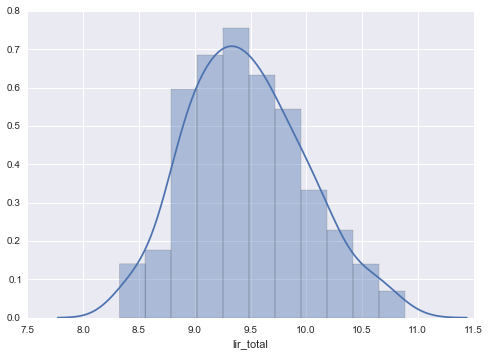

In [55]:
sn.distplot(hrs_fits['lir_total'])

Looks like a Gaussian distribution with a slight tail towards high luminosity. Median looks to be out $10^{9.25} L_{\odot}$ with a spread of about 0.5 dex.

In [56]:
print 'Median LIR = ', hrs_fits['lir_total'].median()
print 'Sigma LIR = ', hrs_fits['lir_total'].std()

Median LIR =  9.431895809
Sigma LIR =  0.523731564783


Now lets break it up into the two components: LSB and LAGN which are the starburst and AGN components. These aren't saved in the file specifically, rather what we have is the total luminosity and the AGN fraction. So LAGN is just the AGN fraction multiplied by the total and the starburst luminosity is what's leftover after subtracting out the AGN.

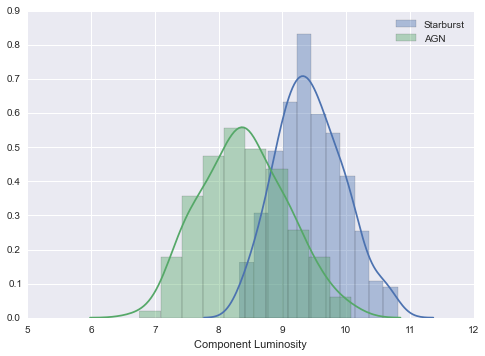

In [58]:
hrs_fits['lir_agn'] = np.log10(hrs_fits['agn_frac']*10**(hrs_fits['lir_total']))
hrs_fits['lir_sb'] = np.log10((1-hrs_fits['agn_frac'])*10**(hrs_fits['lir_total']))
ax = sn.distplot(hrs_fits['lir_sb'])
sn.distplot(hrs_fits['lir_agn'][np.isfinite(hrs_fits['lir_agn'])])
ax.set_xlabel('Component Luminosity')
ax.legend(['Starburst', 'AGN'])

Clearly like expected the Starburst luminosity is much larger than the measured AGN luminosity by at least an order of magnitude. Let's look at the actual AGN fraction distribution.

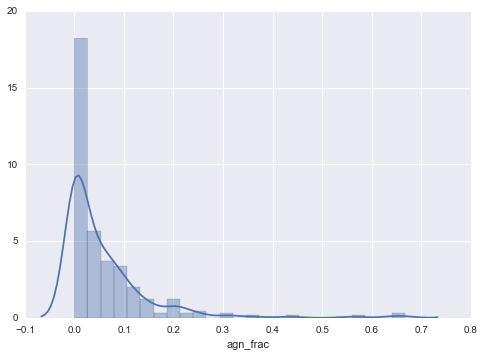

In [59]:
sn.distplot(hrs_fits['agn_frac'])

Just like for the DecompIR model, there is quite a long tail towards larger AGN fractions up to about 30%. I wonder if they are the same sources?

In [60]:
print 'Median AGN Fraction = ', hrs_fits['agn_frac'].median()
print 'Sigma AGN Fraction = ', hrs_fits['agn_frac'].std()
print ''
print 'Median Starburst LIR = ', hrs_fits['lir_sb'].median()
print 'Sigma Starburt LIR = ', hrs_fits['lir_sb'].std()
print ''
print 'Median AGN LIR = ', hrs_fits['lir_agn'][np.isfinite(hrs_fits['lir_agn'])].median()
print 'Sigma AGN LIR = ', hrs_fits['lir_agn'][np.isfinite(hrs_fits['lir_agn'])].std()

Median AGN Fraction =  0.0298
Sigma AGN Fraction =  0.0948703950193

Median Starburst LIR =  9.39380070482
Sigma Starburt LIR =  0.524827050378

Median AGN LIR =  8.38734897952
Sigma AGN LIR =  0.665814901032


The median AGN fraction is only 3% with a spread of 9% so most sources aren't close to being AGN dominated. Let's list however the sources that are above a 20% AGN fraction.

In [61]:
hrs_fits[hrs_fits['agn_frac'] > 0.2]

,agn_frac,agn_frac_mir,alpha,chi2,lir_total,norm,lir_agn,lir_sb
Name,,,,,,,,
HRS10,0.2076,0.45,3.9375,-17.646830,8.890170,-0.558125,8.207398,8.789115
HRS129,0.3630,0.70,2.1250,14.718621,8.798181,-0.895829,8.358087,8.602320
HRS138,0.6404,0.90,1.8750,199.953759,9.173871,-0.685167,8.980322,8.729690
HRS161,0.2562,0.55,2.4375,61.637355,9.269503,-0.260948,8.678082,9.140959
HRS180,0.2429,0.55,2.2500,29.412910,8.887168,-0.753653,8.272596,8.766321
HRS183,0.5616,0.80,3.9375,1244.641527,9.508866,0.329965,9.258293,9.150736
HRS186,0.6666,0.90,2.0000,44.391509,9.043929,-0.770571,8.867794,8.566894
HRS231,0.4322,0.75,2.1875,35.718048,8.896658,-0.733950,8.532343,8.650854
HRS27,0.2079,0.50,2.2500,4.337701,9.552947,-0.427060,8.870802,9.451727


8 out of the 23 sources also have AGN fractions greater than 20%. These are HRS 138, 180, 186, 27, 292, 296, 50, and 56. Their NGC ids are 4374, 4477, 4494, 3442, 5145, 5273, 3655, and 3683. Interestingly, many of these galaxies also are early type galaxies. 

We can also look at the distribution of $\alpha$ for these galaxies.

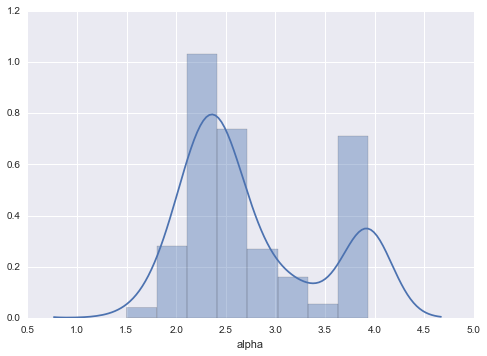

In [62]:
sn.distplot(hrs_fits['alpha'])

There looks like there are two groups. One centered around 2.3 and another at 4.0. I suspect these two groups are separated into early and late type. I believe I remember reading that a value near 2.0 is more indicative of actively star-forming galaxies and larger values closer to 4.0 are for colder, red and dead galaxies. I do have and indicator for galaxy type for all of the HRS galaxies.

In [27]:
hrs_data = pd.read_table('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/HRS/HRS_PHOTOMETRY_v2.1.txt', index_col=0)
hrs_data.index = ['HRS'+str(x) for x in hrs_data.index]
hrs_type = hrs_data['Type']

The HRS type indicator is an integer from -2 to 13. The meaning for each integer can be found in Cortese et al 2012 (i.e. the GALEX HRS paper).

Essentially, I'll group Types -2 to 2 as early type galaxy, 3 to 11 as late type, 12 and 13 as other, and 14-17 as BCD.

In [46]:
hrs_data['Type_Broad'] = 'blah'
hrs_data['Type_Broad'][(hrs_type >= -2) & (hrs_type <= 2)] = 'Early'
hrs_data['Type_Broad'][(hrs_type >= 3) & (hrs_type <= 11)] = 'Late'
hrs_data['Type_Broad'][(hrs_type >= 12) & (hrs_type <= 13)] = 'Other'
hrs_data['Type_Broad'][(hrs_type >= 14) & (hrs_type <= 17)] = 'BCD'

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ttshimiz/ana

Now lets plot the distribution of $\alpha$ based on their broad morphological type.

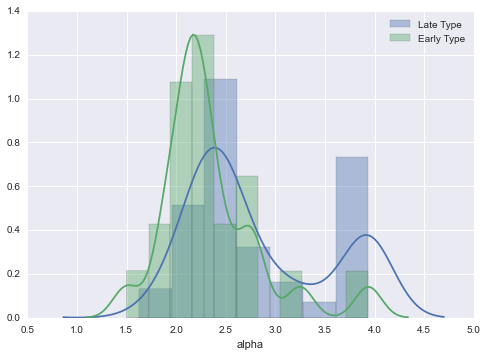

In [63]:
hrs_data['alpha'] = hrs_fits['alpha']
ax = sn.distplot(hrs_data['alpha'][hrs_data['Type_Broad']=='Late'].dropna())
sn.distplot(hrs_data['alpha'][hrs_data['Type_Broad']=='Early'].dropna())
ax.legend(['Late Type', 'Early Type'])

Based on the broad morphological types though is doesn't look like the $\alpha$ parameter is dependent on it. The late type galaxies contain both groups we are seeing. We'll have to look at the actual SEDs to make sure there isn't some problem that is occurring in their fitting to see what's going on.

In [64]:
hrs_fits[hrs_fits['alpha'] == 3.9375]

,agn_frac,agn_frac_mir,alpha,chi2,lir_total,norm,lir_agn,lir_sb
Name,,,,,,,,
HRS109,0.0000,0.00,3.9375,-2.927203,9.046136,-0.257429,-inf,9.046136
HRS10,0.2076,0.45,3.9375,-17.646830,8.890170,-0.558125,8.207398,8.789115
HRS124,0.0166,0.05,3.9375,-7.641278,9.253803,-0.042950,7.473911,9.246534
HRS128,0.0000,0.00,3.9375,-17.033289,8.920874,-0.645249,-inf,8.920874
HRS133,0.0000,0.00,3.9375,21.377671,9.008012,-0.340361,-inf,9.008012
HRS140,0.0000,0.00,3.9375,-6.955117,9.148938,-0.154627,-inf,9.148938
HRS147,0.0000,0.00,3.9375,-5.074328,9.101498,-0.202067,-inf,9.101498
HRS148,0.0000,0.00,3.9375,16.483588,9.275280,-0.028285,-inf,9.275280
HRS154,0.0000,0.00,3.9375,9.656543,9.179313,-0.386810,-inf,9.179313


We can also look at $\alpha$'s relationship to some of the dust properties measured using the single greybody. We would expect for high values of alpha, the average dust temperature to be colder than for low values.

In [51]:
hrs_fits_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/hrs_beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior_hrs.csv', index_col=0)

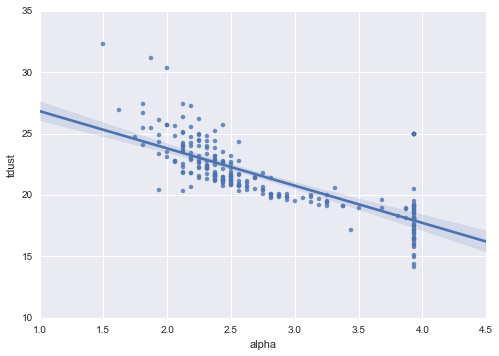

In [65]:
sn.regplot(hrs_fits['alpha'], hrs_fits_casey['tdust'])

Sure enough $\alpha$ is inversely proportional to the dust temperature. The one outlier at very low $\alpha$ is HRS 3 which has $\alpha=0.0625$ but based on the SED fit, it looks like something went wrong and I should probably redo the fit. (<b>Update:</b> I've fixed the fit for HRS 3 so it no longer is an outlier. The fit failed because there wasn't any data for PACS 100 and the error was 0. I just omitted that band and redid the fit.)

Nearly all of the sources that have $\alpha=3.975$ are below a dust temperature of 20 K.

Let's look at the distribution of the AGN fraction of only the Late Type galaxies given that a lot of the galaxies with relatively high AGN fractions are Early type.

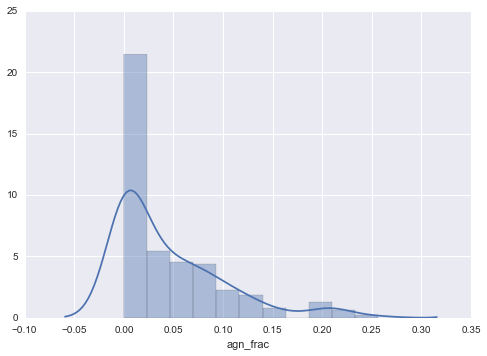

In [67]:
hrs_fits['Type_Broad'] = hrs_data['Type_Broad']
sn.distplot(hrs_fits['agn_frac'][hrs_fits['Type_Broad'] == 'Late'])

Looks like all of the galaxies with AGN fraction greater than 30\% were removed when we only look at the late type galaxies which I guess is pretty interesting. I wonder if a lot of the early type galaxies in the HRS have an AGN. 